In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

/home/sato/linda-forest-climate/notebooks/env/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
df = pd.read_csv('../../data/sweden/sample_plots_all_features.csv')

In [3]:
df.head()

,year,plotid,landuseclass,easting,northing,longitude,latitude,volbirch,volcontorta,volpine,...,era5_consecutive_dry_days_index_per_time_period,era5_number_of_cdd_periods_with_more_than_5days_per_time_period,era5_consecutive_wet_days_index_per_time_period,era5_number_of_cwd_periods_with_more_than_5days_per_time_period,era5_precipitation_days_index_per_time_period,era5_wet_days_index_per_time_period,era5_highest_one_day_precipitation_amount_per_time_period,era5_highest_five_day_precipitation_amount_per_time_period,era5_number_of_5day_heavy_precipitation_periods_per_time_period,era5_simple_daily_intensity_index_per_time_period
0,2007,106,Skogsm,669894,7116684,18.491601,64.134697,78.134338,0.0,0.0,...,33.0,205.0,31.0,76.0,2741.0,2741.0,64.8069,64.8069,31.0,5.361475
1,2007,112,Skogsm,670490,7116694,18.503833,64.134493,0.000000,0.0,0.0,...,33.0,205.0,31.0,76.0,2741.0,2741.0,64.8069,64.8069,31.0,5.361475
2,2007,118,Myr,671088,7116706,18.516109,64.134305,84.315784,0.0,0.0,...,33.0,205.0,31.0,76.0,2741.0,2741.0,64.8069,64.8069,31.0,5.361475
3,2007,212,Skogsm,671110,7115502,18.515195,64.123509,0.000000,0.0,0.0,...,33.0,204.0,31.0,69.0,2712.0,2712.0,64.8069,64.8069,31.0,5.494736
4,2007,218,Skogsm,671117,7114900,18.514657,64.118114,0.000000,0.0,0.0,...,33.0,204.0,31.0,69.0,2712.0,2712.0,64.8069,64.8069,31.0,5.494736


In [4]:
df.columns

Index(['year', 'plotid', 'landuseclass', 'easting', 'northing', 'longitude',
       'latitude', 'volbirch', 'volcontorta', 'volpine', 'volspruce',
       'volotherdec', 'pine_spruce_ratio', 'voltotal',
       'uerra_consecutive_frost_days_index_per_time_period',
       'uerra_number_of_cfd_periods_with_more_than_5days_per_time_period',
       'uerra_frost_days_index_per_time_period',
       'uerra_consecutive_summer_days_index_per_time_period',
       'uerra_number_of_csu_periods_with_more_than_5days_per_time_period',
       'uerra_ice_days_index_per_time_period',
       'uerra_summer_days_index_per_time_period',
       'uerra_consecutive_dry_days_index_per_time_period',
       'uerra_number_of_cdd_periods_with_more_than_5days_per_time_period',
       'uerra_consecutive_wet_days_index_per_time_period',
       'uerra_number_of_cwd_periods_with_more_than_5days_per_time_period',
       'uerra_precipitation_days_index_per_time_period',
       'uerra_wet_days_index_per_time_period',
       

In [5]:
input_columns = [c for c in df.columns if 'era5' in c]

In [6]:
input_columns

['era5_number_of_cfd_periods_with_more_than_5days_per_time_period',
 'era5_frost_days_index_per_time_period',
 'era5_number_of_csu_periods_with_more_than_5days_per_time_period',
 'era5_ice_days_index_per_time_period',
 'era5_summer_days_index_per_time_period',
 'era5_consecutive_dry_days_index_per_time_period',
 'era5_number_of_cdd_periods_with_more_than_5days_per_time_period',
 'era5_consecutive_wet_days_index_per_time_period',
 'era5_number_of_cwd_periods_with_more_than_5days_per_time_period',
 'era5_precipitation_days_index_per_time_period',
 'era5_wet_days_index_per_time_period',
 'era5_highest_one_day_precipitation_amount_per_time_period',
 'era5_highest_five_day_precipitation_amount_per_time_period',
 'era5_number_of_5day_heavy_precipitation_periods_per_time_period',
 'era5_simple_daily_intensity_index_per_time_period']

In [7]:
X = df[input_columns]

In [8]:
X.head()

,era5_number_of_cfd_periods_with_more_than_5days_per_time_period,era5_frost_days_index_per_time_period,era5_number_of_csu_periods_with_more_than_5days_per_time_period,era5_ice_days_index_per_time_period,era5_summer_days_index_per_time_period,era5_consecutive_dry_days_index_per_time_period,era5_number_of_cdd_periods_with_more_than_5days_per_time_period,era5_consecutive_wet_days_index_per_time_period,era5_number_of_cwd_periods_with_more_than_5days_per_time_period,era5_precipitation_days_index_per_time_period,era5_wet_days_index_per_time_period,era5_highest_one_day_precipitation_amount_per_time_period,era5_highest_five_day_precipitation_amount_per_time_period,era5_number_of_5day_heavy_precipitation_periods_per_time_period,era5_simple_daily_intensity_index_per_time_period
0,133.0,3679.0,78.0,1950.0,1588.0,33.0,205.0,31.0,76.0,2741.0,2741.0,64.8069,64.8069,31.0,5.361475
1,133.0,3679.0,78.0,1950.0,1588.0,33.0,205.0,31.0,76.0,2741.0,2741.0,64.8069,64.8069,31.0,5.361475
2,133.0,3679.0,78.0,1950.0,1588.0,33.0,205.0,31.0,76.0,2741.0,2741.0,64.8069,64.8069,31.0,5.361475
3,127.0,3605.0,77.0,1903.0,1595.0,33.0,204.0,31.0,69.0,2712.0,2712.0,64.8069,64.8069,31.0,5.494736
4,127.0,3605.0,77.0,1903.0,1595.0,33.0,204.0,31.0,69.0,2712.0,2712.0,64.8069,64.8069,31.0,5.494736


In [9]:
df['pine'] = np.where(df.volpine > 0.5, 1, 0)
df['spruce'] = np.where(df.volspruce > 0.5, 1, 0)

In [10]:
df.groupby('pine').count()

,year,plotid,landuseclass,easting,northing,longitude,latitude,volbirch,volcontorta,volpine,...,era5_number_of_cdd_periods_with_more_than_5days_per_time_period,era5_consecutive_wet_days_index_per_time_period,era5_number_of_cwd_periods_with_more_than_5days_per_time_period,era5_precipitation_days_index_per_time_period,era5_wet_days_index_per_time_period,era5_highest_one_day_precipitation_amount_per_time_period,era5_highest_five_day_precipitation_amount_per_time_period,era5_number_of_5day_heavy_precipitation_periods_per_time_period,era5_simple_daily_intensity_index_per_time_period,spruce
pine,,,,,,,,,,,,,,,,,,,,,
0,10310,10310,10310,10310,10310,10310,10310,10310,10310,10310,...,10310,10310,10310,10310,10310,10310,10310,10310,10310,10310
1,13929,13929,13929,13929,13929,13929,13929,13929,13929,13929,...,13929,13929,13929,13929,13929,13929,13929,13929,13929,13929


In [11]:
df.groupby('spruce').count()

,year,plotid,landuseclass,easting,northing,longitude,latitude,volbirch,volcontorta,volpine,...,era5_number_of_cdd_periods_with_more_than_5days_per_time_period,era5_consecutive_wet_days_index_per_time_period,era5_number_of_cwd_periods_with_more_than_5days_per_time_period,era5_precipitation_days_index_per_time_period,era5_wet_days_index_per_time_period,era5_highest_one_day_precipitation_amount_per_time_period,era5_highest_five_day_precipitation_amount_per_time_period,era5_number_of_5day_heavy_precipitation_periods_per_time_period,era5_simple_daily_intensity_index_per_time_period,pine
spruce,,,,,,,,,,,,,,,,,,,,,
0,8718,8718,8718,8718,8718,8718,8718,8718,8718,8718,...,8718,8718,8718,8718,8718,8718,8718,8718,8718,8718
1,15521,15521,15521,15521,15521,15521,15521,15521,15521,15521,...,15521,15521,15521,15521,15521,15521,15521,15521,15521,15521


# Pine Classifier

In [12]:
y_pine = df['pine']

In [13]:
X_pine_resampled, y_pine_resampled = SMOTE().fit_resample(X, y_pine)

In [14]:
X_pine_train, X_pine_test, y_pine_train, y_pine_test = train_test_split(X_pine_resampled, y_pine_resampled, train_size=0.7)

In [15]:
pine_parameters = {'n_estimators': [10, 50, 100], 'max_depth': [50, 75, 100]}

In [16]:
clf_pine = GridSearchCV(RandomForestClassifier(), cv=3, param_grid=pine_parameters, verbose=9)

In [17]:
clf_pine.fit(X_pine_train, y_pine_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] max_depth=50, n_estimators=10 ...................................
[CV] ....... max_depth=50, n_estimators=10, score=0.643, total=   0.1s
[CV] max_depth=50, n_estimators=10 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ....... max_depth=50, n_estimators=10, score=0.653, total=   0.1s
[CV] max_depth=50, n_estimators=10 ...................................
[CV] ....... max_depth=50, n_estimators=10, score=0.650, total=   0.1s
[CV] max_depth=50, n_estimators=50 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


[CV] ....... max_depth=50, n_estimators=50, score=0.642, total=   0.7s
[CV] max_depth=50, n_estimators=50 ...................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s remaining:    0.0s


[CV] ....... max_depth=50, n_estimators=50, score=0.650, total=   0.7s
[CV] max_depth=50, n_estimators=50 ...................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.9s remaining:    0.0s


[CV] ....... max_depth=50, n_estimators=50, score=0.651, total=   0.7s
[CV] max_depth=50, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.6s remaining:    0.0s


[CV] ...... max_depth=50, n_estimators=100, score=0.643, total=   1.4s
[CV] max_depth=50, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.0s remaining:    0.0s


[CV] ...... max_depth=50, n_estimators=100, score=0.648, total=   1.4s
[CV] max_depth=50, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.4s remaining:    0.0s


[CV] ...... max_depth=50, n_estimators=100, score=0.651, total=   1.4s
[CV] max_depth=75, n_estimators=10 ...................................
[CV] ....... max_depth=75, n_estimators=10, score=0.645, total=   0.1s
[CV] max_depth=75, n_estimators=10 ...................................
[CV] ....... max_depth=75, n_estimators=10, score=0.645, total=   0.1s
[CV] max_depth=75, n_estimators=10 ...................................
[CV] ....... max_depth=75, n_estimators=10, score=0.653, total=   0.1s
[CV] max_depth=75, n_estimators=50 ...................................
[CV] ....... max_depth=75, n_estimators=50, score=0.644, total=   0.7s
[CV] max_depth=75, n_estimators=50 ...................................
[CV] ....... max_depth=75, n_estimators=50, score=0.649, total=   0.7s
[CV] max_depth=75, n_estimators=50 ...................................
[CV] ....... max_depth=75, n_estimators=50, score=0.651, total=   0.7s
[CV] max_depth=75, n_estimators=100 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   20.6s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [18]:
y_pine_pred = clf_pine.predict(X_pine_test)

In [19]:
accuracy_score(y_pine_pred, y_pine_test)

0.6647523330940417

In [20]:
precision_score(y_pine_pred, y_pine_test)

0.7030012004801921

In [21]:
recall_score(y_pine_pred, y_pine_test)

0.651680391720454

In [22]:
cm = confusion_matrix(y_pine_pred, y_pine_test)
cm

array([[2628, 1237],
       [1565, 2928]])

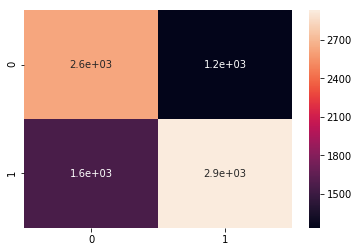

In [23]:
sn.heatmap(cm, annot=True)

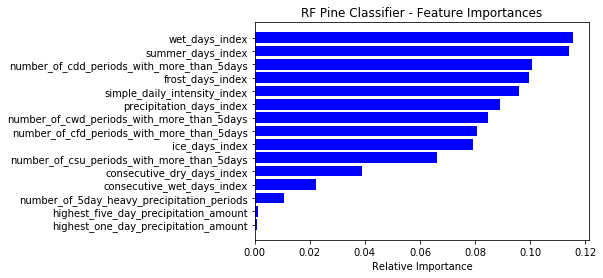

In [25]:
features = [c[5:-16] for c in X.columns]
importances = clf_pine.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.title('RF Pine Classifier - Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Spruce

In [26]:
y_spruce = df['spruce']

In [27]:
X_spruce_resampled, y_spruce_resampled = SMOTE().fit_resample(X, y_spruce)

In [28]:
X_spruce_train, X_spruce_test, y_spruce_train, y_spruce_test = train_test_split(X_spruce_resampled, y_spruce_resampled, train_size=0.7)

In [29]:
spruce_parameters = {'n_estimators': [100], 'max_depth': [10, 25, 50]}

In [30]:
clf_spruce = GridSearchCV(RandomForestClassifier(), param_grid=spruce_parameters, cv=10, verbose=9)

In [31]:
clf_spruce.fit(X_spruce_train, y_spruce_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... max_depth=10, n_estimators=100, score=0.627, total=   1.5s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.617, total=   1.4s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.614, total=   1.4s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.3s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.609, total=   1.5s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.8s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.635, total=   1.5s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.3s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.619, total=   1.4s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.7s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.616, total=   1.4s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   10.1s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.606, total=   1.4s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   11.6s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.601, total=   1.4s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.615, total=   1.5s
[CV] max_depth=25, n_estimators=100 ..................................
[CV] ...... max_depth=25, n_estimators=100, score=0.624, total=   2.0s
[CV] max_depth=25, n_estimators=100 ..................................
[CV] ...... max_depth=25, n_estimators=100, score=0.617, total=   2.1s
[CV] max_depth=25, n_estimators=100 ..................................
[CV] ...... max_depth=25, n_estimators=100, score=0.627, total=   2.1s
[CV] max_depth=25, n_estimators=100 ..................................
[CV] ...... max_depth=25, n_estimators=100, score=0.612, total=   2.1s
[CV] max_depth=25, n_estimators=100 ..................................
[CV] ...... max_depth=25, n_estimators=100, score=0.631, total=   2.0s
[CV] max_depth=25, n_estimators=100 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   55.6s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [32]:
clf_spruce.best_params_

{'max_depth': 25, 'n_estimators': 100}

In [33]:
y_spruce_pred = clf_spruce.predict(X_spruce_test)

In [34]:
accuracy_score(y_spruce_pred, y_spruce_test)

0.6303017287662407

In [37]:
precision_score(y_spruce_pred, y_spruce_test)

0.6268975839213171

In [38]:
recall_score(y_spruce_pred, y_spruce_test)

0.6332613390928725

In [39]:
cm = confusion_matrix(y_spruce_pred, y_spruce_test)
cm

array([[2938, 1745],
       [1698, 2932]])

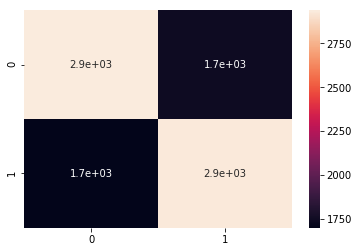

In [41]:
sn.heatmap(cm, annot=True)

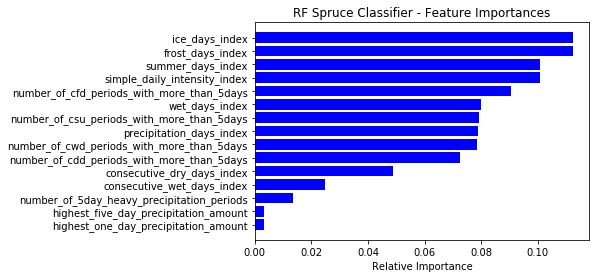

In [43]:
features = [c[5:-16] for c in X.columns]
importances = clf_spruce.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.title('RF Spruce Classifier - Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()